In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import os
import sys 
from dataset import ImageDataset
import cv2
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:


class VGG16(nn.Module):
    def __init__(self, num_classes = 5):
        super(VGG16, self).__init__()  
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3, 64, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU())                               
        self.layer_2 = nn.Sequential(
            nn.Conv2d(64, 64, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer_3 = nn.Sequential(
            nn.Conv2d(64, 128, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer_4 = nn.Sequential(
            nn.Conv2d(128, 128, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer_5 = nn.Sequential(
            nn.Conv2d(128, 256, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer_6 = nn.Sequential(
            nn.Conv2d(256, 256, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer_7 = nn.Sequential(
            nn.Conv2d(256,256, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer_8 = nn.Sequential(
            nn.Conv2d(256, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer_9 = nn.Sequential(
            nn.Conv2d(512, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer_10 = nn.Sequential(
            nn.Conv2d(512, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer_11 = nn.Sequential(
            nn.Conv2d(512, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer_12 = nn.Sequential(
            nn.Conv2d(512, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer_13 = nn.Sequential(
            nn.Conv2d(512, 512, stride=1,kernel_size=3, padding= 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Linear(7*7*512,4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU())
        self.fc3 = nn.Sequential(
            nn.Linear(4096,num_classes),
            nn.Softmax(dim=1))
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = self.layer_6(out)
        out = self.layer_7(out)
        out = self.layer_8(out)
        out = self.layer_9(out)
        out = self.layer_10(out)
        out = self.layer_11(out)
        out = self.layer_12(out)
        out = self.layer_13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)        
        out = self.fc2(out)   
        out = self.fc3(out)     
        return out    
   

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = VGG16().to(device)
model.load_state_dict(torch.load('model_v2.pth'))

normalize = transforms.Normalize(mean=[0.6294252 ,0.5640652, 0.43935286],
                                 std=[0.30229854, 0.30542128, 0.33676283])

transformers = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize

])

im = cv2.imread('strawberry.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


print(im.shape)
input = transformers(im).to(device)
print(input.shape)

input = input.unsqueeze(0)

model.eval()


cuda
(184, 275, 3)
torch.Size([3, 224, 224])


VGG16(
  (layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer_4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_m

(184, 275, 3)


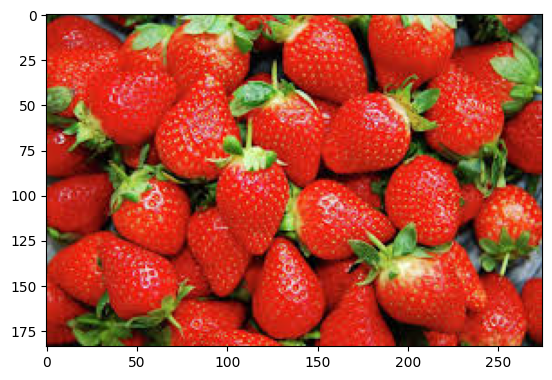

tensor([[8.3192e-08, 3.6528e-09, 3.2255e-08, 1.0259e-09, 1.0000e+00]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor(4, device='cuda:0')
strawberry


In [17]:
lables = ['apple', 'banana', 'grape', 'mango', 'strawberry']

print(im.shape)
plt.imshow(im)
plt.show()


output = model(input)
print(output)
output = output.argmax()
print(output)

print(lables[output])

In [10]:
u = torch.tensor([2,1,2], dtype=torch.u)
u = u / 255.
print(u)

tensor([0.0078, 0.0039, 0.0078])
